<a href="https://colab.research.google.com/github/shshahul/ML_Projeccts/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


#Variables in the Dataset :


In [ ]:
import pandas as pd
import numpy as np
import statistics as st


In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/train.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data Cleaning

In [ ]:
df.shape

(45211, 11)

In [ ]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['dur'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

#Dropping duplicate data

In [ ]:
df = df.drop_duplicates()

* There are some missing values in the name of "unknown" where ever this unkown values are less their we consider it as missing values their we do some treatment

* In "job and "education_qual" the unknown values are less and considering them as outliers imputing then with mode().

In [ ]:
df['job'].value_counts()        #288 unknown values  doing some replacement

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job'] = df['job'].replace('unknown',df['job'].mode()[0])

<ipython-input-17-4da0cfe89d9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].replace('unknown',df['job'].mode()[0])


In [ ]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df['education_qual'].value_counts()     #1857 unknown values are less i am doing some replacement

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
#replacing the unknown values
df['education_qual'] = df['education_qual'].replace("unknown",df['education_qual'].mode()[0])

In [ ]:
df['education_qual'].value_counts()  

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
df['education_qual'] = df['education_qual'].fillna("secondary")

In [ ]:
df['call_type'].value_counts()        #13012 more values are their considering it as separate catogory

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df['prev_outcome'].value_counts()      #36943 more unknown values are more i am considering it as sperate catogory

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df['mon'].isnull().sum()

0

In [ ]:
df['num_calls'].value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [ ]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.shape

(45205, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


* for detecting the outliers i am using inter quartile range
* and for correcting the data i am using "clipping method

In [ ]:
#IQR :interquartile range (IQR) is the range of values that resides in the middle of the scores
IQR = df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
UL = df['dur'].quantile(0.75)+(1.5*IQR)
LL = df['dur'].quantile(0.25)-(1.5*IQR)
UL,LL

(643.0, -221.0)

In [ ]:
df['dur']= df.dur.clip(LL,UL)

In [ ]:
IQR = df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
UL = df['num_calls'].quantile(0.75)+(1.5*IQR)
LL = df['num_calls'].quantile(0.25)-(1.5*IQR)
UL,LL

(6.0, -2.0)

In [ ]:
df['num_calls'] = df.num_calls.clip(LL,UL)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


#Checking the data format

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Adding a target column by mapping the values of "y"
df['target'] = df['y'].map({"yes":1,"no":0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  int64  
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  float64
 8   num_calls       45205 non-null  float64
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
 11  target          45205 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
target              int64
dtype: object

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0


In [ ]:
df.isnull().sum().sum()

0

* checked the data info their is no error in the datatype
* there are some duplicate values which has droped 
* done some treatment to the less unknown values 
* checked the outliers and corrected it with clipping 


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'age vs insurance buy')

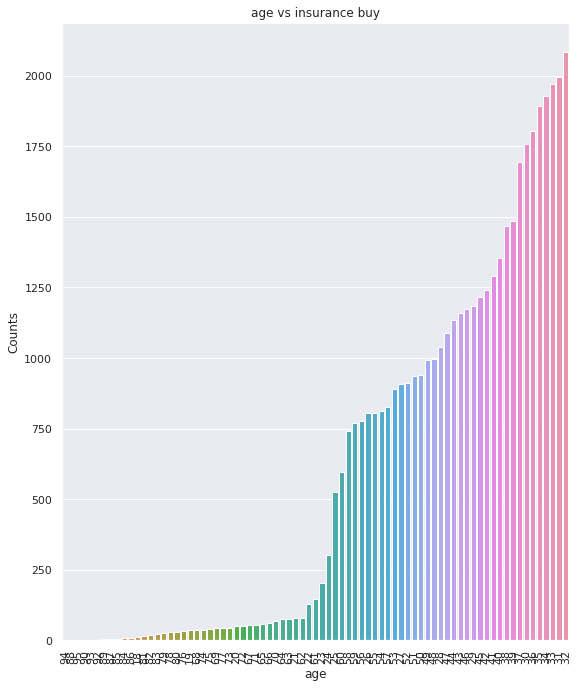

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style = 'darkgrid', palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(221)
sns.countplot(df['age'],order = df['age'].value_counts().index[::-1])
plt.xticks(rotation=90)
plt.xlabel('age')
plt.ylabel('Counts')
plt.title('age vs insurance buy')




Text(0.5, 1.0, 'Jobs Based insurence count')

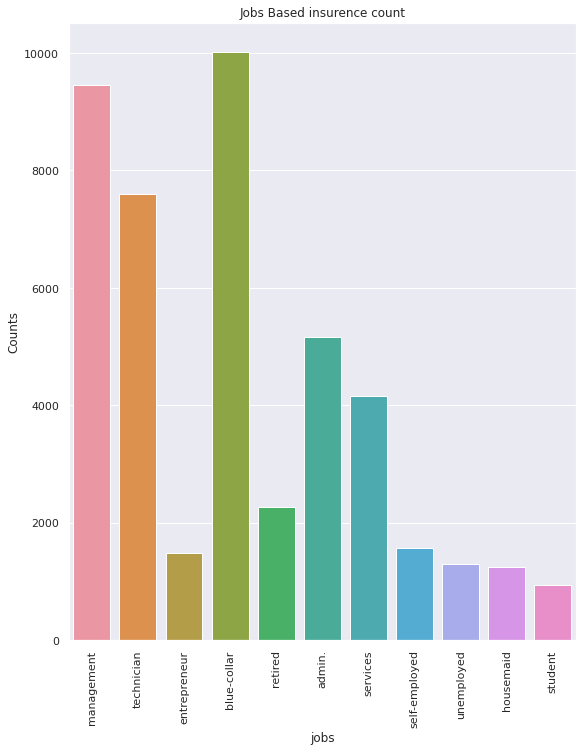

In [ ]:
sns.set_theme(style = 'darkgrid', palette='pastel')
plt.figure(figsize=(20,25))
plt.subplot(221)

sns.countplot(df['job'])
plt.xticks(rotation=90)
plt.xlabel('jobs')
plt.ylabel('Counts')
plt.title("Jobs Based insurence count")

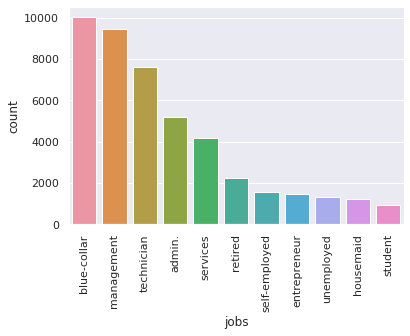

In [ ]:
df_job = pd.DataFrame(df.job.value_counts()).sort_values("job", ascending = False).reset_index()
df_job.rename(columns = {'index':"jobs","job":"count"},inplace = True)
bar = sns.barplot(data = df_job,x = df_job['jobs'], y =df_job["count"])
bar.tick_params(axis = "x", rotation = 90)


Text(0.5, 1.0, 'Based on Marital_Status')

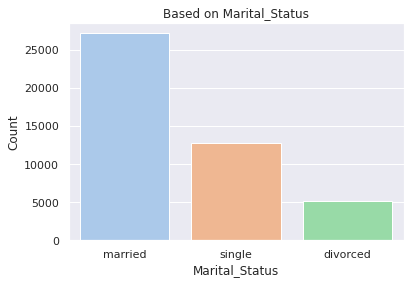

In [ ]:


sns.countplot(df['marital'])
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Based on Marital_Status')


Text(0.5, 1.0, 'Based on education')

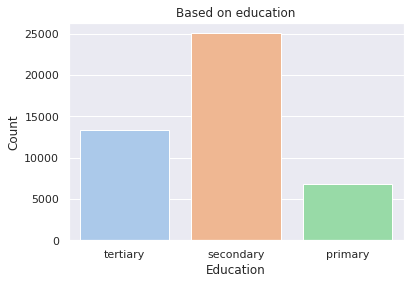

In [ ]:

sns.countplot(df["education_qual"])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Based on education')

Text(0.5, 1.0, 'Based on call type')

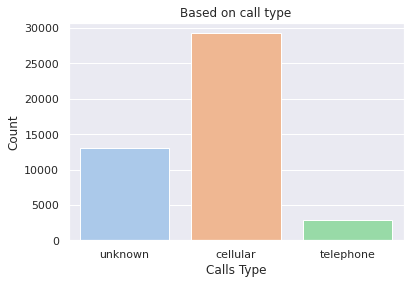

In [ ]:
sns.countplot(df["call_type"])
plt.xlabel('Calls Type')
plt.ylabel('Count')
plt.title('Based on call type')

Text(0.5, 1.0, 'Month day wise count')

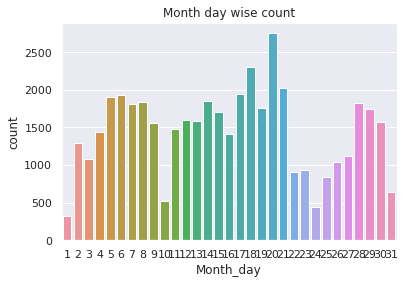

In [ ]:
sns.countplot(df['day'])
plt.xticks(rotation = 0)
plt.xlabel('Month_day')
plt.ylabel('count')
plt.title('Month day wise count')

Text(0.5, 1.0, 'Month wise count')

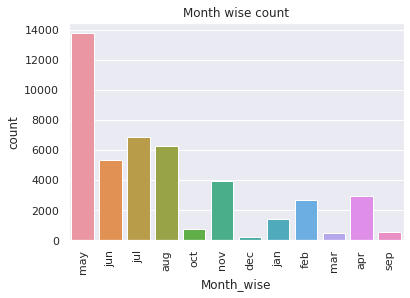

In [ ]:
sns.countplot(df['mon'])
plt.xticks(rotation = 90)
plt.xlabel('Month_wise')
plt.ylabel('count')
plt.title('Month wise count')

Text(0.5, 1.0, ' privious_outcome wise count')

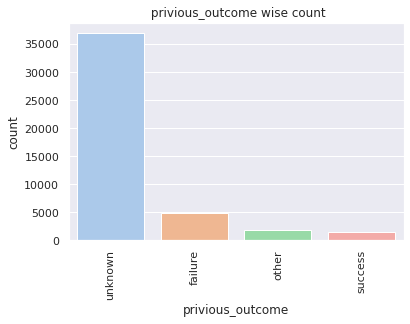

In [ ]:
sns.countplot(df['prev_outcome'])
plt.xticks(rotation = 90)
plt.xlabel('privious_outcome')
plt.ylabel('count')
plt.title(' privious_outcome wise count')

Text(0.5, 1.0, ' target_outcome wise count')

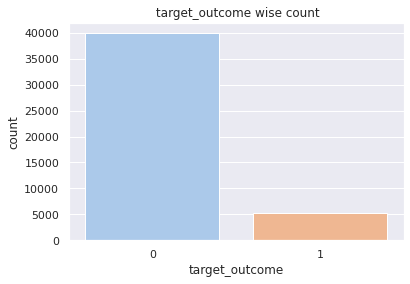

In [ ]:
sns.countplot(df['target'])

plt.xlabel('target_outcome')
plt.ylabel('count')
plt.title(' target_outcome wise count')

#categorical columns vs target

<AxesSubplot:ylabel='job'>

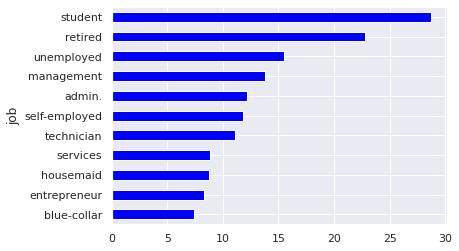

In [ ]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind='barh', color="blue")

<AxesSubplot:ylabel='marital'>

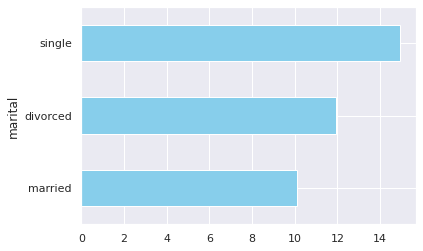

In [ ]:
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="barh",color='skyblue')

<AxesSubplot:ylabel='education_qual'>

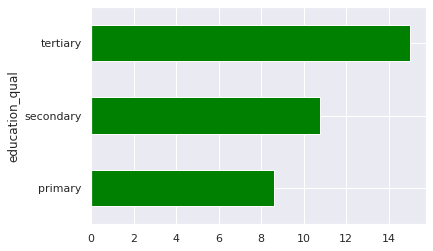

In [ ]:
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="barh",color='green')

<AxesSubplot:ylabel='call_type'>

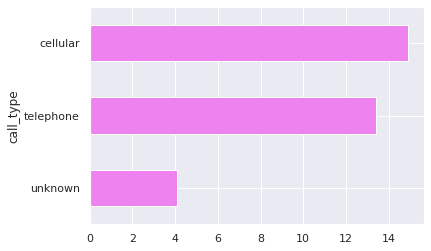

In [ ]:
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="barh",color='violet')

<AxesSubplot:ylabel='mon'>

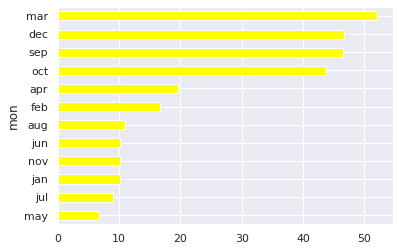

In [ ]:
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="barh",color='yellow')

<AxesSubplot:ylabel='prev_outcome'>

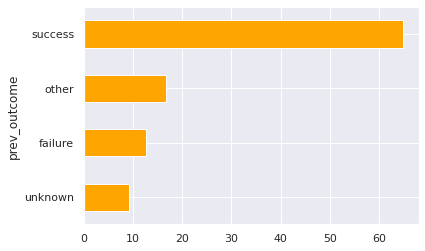

In [ ]:
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="barh",color='orange')

#Data Encoding

In [ ]:
df['job'] = df['job'].map({"blue-collar":0,"entrepreneur" :1, "housemaid":2, "services":3,"technician":4,"self-employed":5, "admin.":6, "management":7,"unemployed":8,"retired":9,"student":10})
df["marital"] = df["marital"].map({"married":0,"divorced":1,"single":2})
df["education_qual"] = df["education_qual"].map({"primary":0,"secondary":1,"tertiary":2})
df["call_type"] = df["call_type"].map({"unknown":0,"telephone":1,"cellular":2})
df["mon"] = df["mon"].map({"may":0,"jul":1,"jan":2,"nov":3,"jun":4,"aug":5,"feb":6,"apr":7,"oct":8,"sep":9,"dec":10,"mar":11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0, 'failure':1,'other':2, 'success':3})



<AxesSubplot:ylabel='job'>

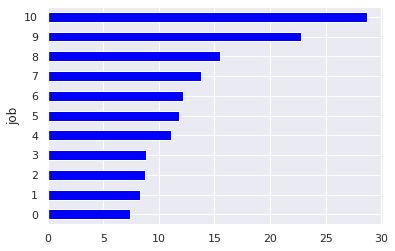

In [ ]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind='barh', color="blue")

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261.0,1.0,0,no,0
1,44,4,2,1,0,5,0,151.0,1.0,0,no,0
2,33,1,0,1,0,5,0,76.0,1.0,0,no,0
3,47,0,0,1,0,5,0,92.0,1.0,0,no,0
4,33,0,2,1,0,5,0,198.0,1.0,0,no,0


#Split the data

In [ ]:
col = [*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [ ]:
col[-1]

'target'

In [ ]:
x = df.loc[:,col[:-2]].values
y = df.loc[:,col[-1]].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)

# Scaling the Featuures
# Balancing the Dataset using SMOTEENN

In [ ]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
X_train_scaled = scaler.transform(x_train) 
X_test_scaled = scaler.transform(x_test)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler() \nscaler.fit(x_train,y_train) \nX_train_scaled = scaler.transform(x_train) \nX_test_scaled = scaler.transform(x_test)'

In [ ]:
df.shape

(45205, 12)

In [ ]:
len(x_train),len(y_train)

(33903, 33903)

In [ ]:
len(x_test),len(y_test)

(11302, 11302)

In [ ]:
#Balance only the train data
#Here with the combination of undersampling and oversampling ,Balancing the data
# SMOTEENN is the most famous approach for both undersampling and oversamplint the data
from imblearn.combine import SMOTEENN

In [ ]:
S = SMOTEENN(sampling_strategy="all")
x_s,y_s = S.fit_resample(x_train,y_train)

In [ ]:
len(x_s), len(y_s)

(51482, 51482)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [ ]:
df_Bal = pd.DataFrame(x_s, columns = df.columns[:-2])

In [ ]:
df_Bal['y'] = y_s

In [ ]:
len(df_Bal[df_Bal['y']==1])/len(df_Bal)

0.5602346451186823

# Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(x_s,y_s)
Log_reg.score(x_test,y_test)


0.7361528932932224

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
Log_reg.score(x_test,y_test)
S = roc_auc_score(y_test,Log_reg.predict_proba(x_test)[:, 1])

In [ ]:
S

0.869573174714337

#KNN-->KNearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_s,y_s)
KNN.score(x_test,y_test)

0.7555299946912051

In [ ]:
h = roc_auc_score(y_test, KNN.predict_proba(x_test)[:, 1])
h

0.8069168417474941

In [ ]:
from sklearn.model_selection import cross_val_score
knn_values=np.arange(1, 50)
cross_val_knn=[]
for k in knn_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_s,y_s)
  cross_val = cross_val_score(knn, x_test, y_test,cv = 15).mean()
  print("K value : ", k, "cross_val_score : ", cross_val)
  cross_val_knn.append(cross_val)
print("The best K-Value is {} and Cross_val_score is: {}".format(np.argmax(cross_val_knn) + 10, max(cross_val_knn)))

K value :  1 cross_val_score :  0.8502890295581598
K value :  2 cross_val_score :  0.8798417881671075
K value :  3 cross_val_score :  0.8742670344263967
K value :  4 cross_val_score :  0.8819668570046367
K value :  5 cross_val_score :  0.8792238062192724
K value :  6 cross_val_score :  0.8828514999829741
K value :  7 cross_val_score :  0.8818784396748404
K value :  8 cross_val_score :  0.8832935866319571
K value :  9 cross_val_score :  0.883558838621347
K value :  10 cross_val_score :  0.8847972683389635
K value :  11 cross_val_score :  0.8834713606522919
K value :  12 cross_val_score :  0.8846204336793703
K value :  13 cross_val_score :  0.8840019820511643
K value :  14 cross_val_score :  0.8849745726789275
K value :  15 cross_val_score :  0.8845321337696662
K value :  16 cross_val_score :  0.8851515247586136
K value :  17 cross_val_score :  0.8850636945292804
K value :  18 cross_val_score :  0.8858595679175427
K value :  19 cross_val_score :  0.8857718551083023
K value :  20 cross_va

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_s,y_s)
DTC.score(x_test,y_test)

0.8495841443992214

In [ ]:
a = roc_auc_score(y_test, DTC.predict_proba(x_test)[:,1])
a

0.800688696612443

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt') # if i kept it default i am getting 0.91 RFC square
RFC.fit(x_s,y_s)
RFC.score(x_test,y_test)

0.7562378340116793

In [ ]:
h = roc_auc_score(y_test,RFC.predict_proba(x_test)[:, 1])
h

0.8772082787528681

#XGboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
XGB = GradientBoostingClassifier(learning_rate=0.15,n_estimators=100)
XGB.fit(x_s,y_s)
XGB.score(x_test,y_test)

0.8637409308087064

In [ ]:
u = roc_auc_score(y_test, XGB.predict_proba(x_test)[:,1])
u

0.91158490029162

In [ ]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = GradientBoostingClassifier(learning_rate=i,n_estimators=100, verbose = 0)
  model.fit(x_s,y_s)
  model.score(x_test,y_test)
  print("learning_rate:", i , "Train_Score:",model.score(x_train,y_train), "Cross_Val_score:",np.mean(cross_val_score(model, x_test,y_test,cv=10)))


learning_rate: 0.01 Train_Score: 0.7222074742648144 Cross_Val_score: 0.8855070694741126
learning_rate: 0.02 Train_Score: 0.7840604076335428 Cross_Val_score: 0.8943546708606215
learning_rate: 0.03 Train_Score: 0.8050025071527593 Cross_Val_score: 0.8989553453361815
learning_rate: 0.04 Train_Score: 0.8182166769902368 Cross_Val_score: 0.8996633099379514
learning_rate: 0.05 Train_Score: 0.8265050290534761 Cross_Val_score: 0.8995746578718811
learning_rate: 0.06 Train_Score: 0.8366221278352948 Cross_Val_score: 0.8993088581645188
learning_rate: 0.07 Train_Score: 0.843022741350323 Cross_Val_score: 0.8988663802884126
learning_rate: 0.08 Train_Score: 0.8484794855912456 Cross_Val_score: 0.8976279899532875
learning_rate: 0.09 Train_Score: 0.8529628646432469 Cross_Val_score: 0.8984242153940049
learning_rate: 0.1 Train_Score: 0.8551750582544317 Cross_Val_score: 0.8981586504229165
learning_rate: 0.11 Train_Score: 0.8580066660767484 Cross_Val_score: 0.8990440756476765
learning_rate: 0.12 Train_Score: 0

In [ ]:
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled, y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))


In [ ]:
for i in [Log_reg,KNN,DTC,RFC,XGB]:
  auroc_score = roc_auc_score(y_test, i.predict_proba(x_test)[:, 1])*100
  print("AUROC_SCORE model is :",(i, round(auroc_score,2)))

AUROC_SCORE model is : (LogisticRegression(), 86.96)
AUROC_SCORE model is : (KNeighborsClassifier(), 80.69)
AUROC_SCORE model is : (DecisionTreeClassifier(), 80.07)
AUROC_SCORE model is : (RandomForestClassifier(max_depth=3), 87.72)
AUROC_SCORE model is : (GradientBoostingClassifier(learning_rate=0.15), 91.16)
